# 標題1
## 標題2
超連結： <網址>
縮排：
>a
>>b

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston() #引入boston資料庫
df = pd.DataFrame(boston["data"],columns=boston['feature_names']) #將boston資料化為表格
df["target"] = boston["target"] #加上target直行
df

C:\Users\Nero\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

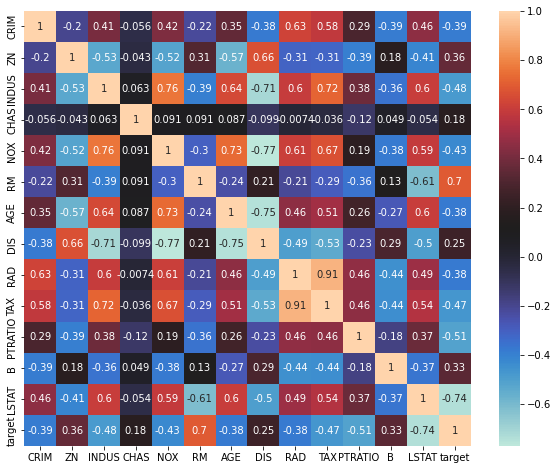

In [2]:
import matplotlib.pyplot as plt #畫圖函式庫
import seaborn as sns #熱點圖函式庫
%matplotlib inline
df.astype("float") #表格內數值轉浮點數
plt.figure(figsize = (10,8)) #調整資料顯示大小
sns.heatmap(df.corr(),cmap="icefire",annot = True) #將資料以熱點圖呈現

In [3]:
from sklearn.model_selection import train_test_split #訓練函式庫
#指定變數給訓練資料與測試資料
x_train,x_test,y_train,y_test = train_test_split(boston["data"] , boston["target"],test_size = 0.1) 


In [4]:
from sklearn.tree import DecisionTreeRegressor #回歸器函式庫
reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(x_train,y_train) #訓練模型


DecisionTreeRegressor(max_depth=5)

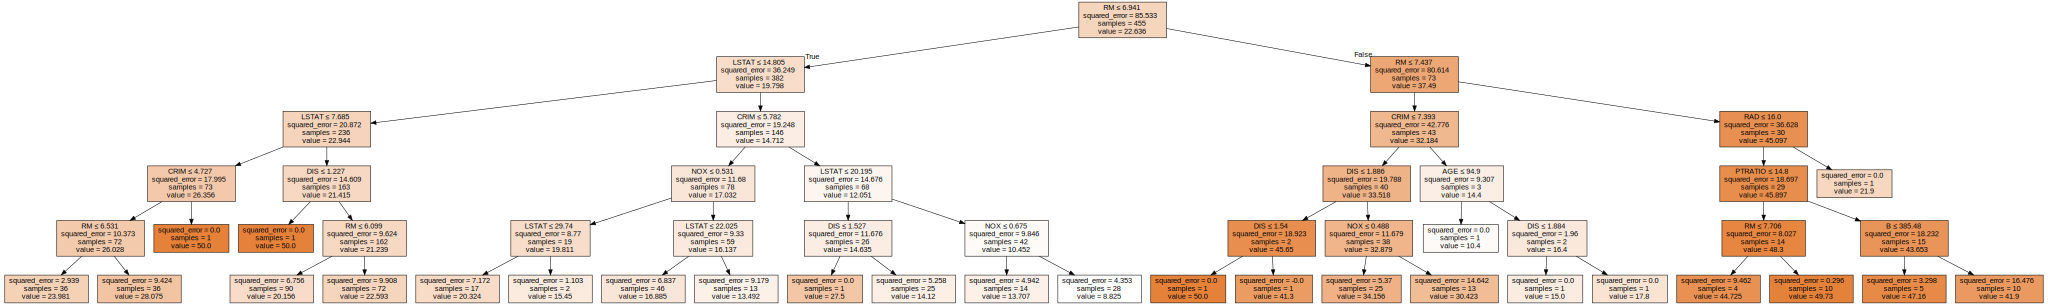

In [5]:
from sklearn.tree import export_graphviz #輸出graphviz函式庫
import graphviz
g = export_graphviz(reg, out_file = None, feature_names = boston["feature_names"], filled = True,special_characters = True)
graph = graphviz.Source(g) #將graphviz資料化為決策樹
graph

In [6]:
pre = reg.predict(x_test) #建立預測結果
print(list(pre))
list(y_test)
from sklearn.metrics import r2_score
r2_score(y_test,pre)

[8.825, 23.980555555555558, 20.155555555555555, 28.075000000000003, 8.825, 34.156000000000006, 16.884782608695655, 8.825, 34.156000000000006, 22.593055555555566, 22.593055555555566, 23.980555555555558, 20.323529411764707, 20.155555555555555, 23.980555555555558, 50.0, 28.075000000000003, 22.593055555555566, 14.12, 16.884782608695655, 20.155555555555555, 20.155555555555555, 23.980555555555558, 23.980555555555558, 8.825, 16.884782608695655, 16.884782608695655, 22.593055555555566, 22.593055555555566, 20.155555555555555, 13.492307692307692, 50.0, 22.593055555555566, 20.155555555555555, 22.593055555555566, 30.42307692307692, 14.12, 16.884782608695655, 22.593055555555566, 22.593055555555566, 28.075000000000003, 14.12, 23.980555555555558, 14.12, 22.593055555555566, 23.980555555555558, 22.593055555555566, 23.980555555555558, 14.12, 28.075000000000003, 16.884782608695655]


0.8511903519493597

In [7]:
from sklearn.metrics import confusion_matrix
CD = confusion_matrix(y_test, pre) #將預測結果化為混淆矩陣
pd.DataFrame(CD) #以Pandas進行處理

ValueError: continuous is not supported